In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (50,25)

In [2]:
df1 = pd.read_csv("MagicBricks.csv")
df1.head(10)


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


In [3]:
df1.shape

(1259, 11)

In [4]:
df1.groupby('Furnishing')['Furnishing'].agg('count')

Furnishing
Furnished         183
Semi-Furnished    709
Unfurnished       363
Name: Furnishing, dtype: int64

In [5]:
df2=df1.drop(['Furnishing','Type','Transaction','Status','Parking'],axis='columns')
df2.head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,6500000,NaN
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24,6200000,6667.0


In [6]:
df2.isnull().sum()

Area          0
BHK           0
Bathroom      2
Locality      0
Price         0
Per_Sqft    241
dtype: int64

In [7]:
df2['Per_Sqft'] = df2['Price']/df2['Area']


In [8]:
df2.isnull().sum()

Area        0
BHK         0
Bathroom    2
Locality    0
Price       0
Per_Sqft    0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

Area        0
BHK         0
Bathroom    0
Locality    0
Price       0
Per_Sqft    0
dtype: int64

In [10]:
df3.shape

(1257, 6)

In [11]:
df3.head(10)

,Area,BHK,Bathroom,Locality,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,6500000,8125.000000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,6666.666667
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",15500000,16315.789474
3,600.0,2,2.0,Rohini Sector 24,4200000,7000.000000
4,650.0,2,2.0,Rohini Sector 24,6200000,9538.461538
5,1300.0,4,3.0,Rohini Sector 24,15500000,11923.076923
6,1350.0,4,3.0,Rohini Sector 24,10000000,7407.407407
7,650.0,2,2.0,"Delhi Homes, Rohini Sector 24",4000000,6153.846154
8,985.0,3,3.0,Rohini Sector 21,6800000,6903.553299
9,1300.0,4,4.0,Rohini Sector 22,15000000,11538.461538


In [12]:
df3['BHK'].unique()

array([ 3,  2,  4,  1,  6,  5,  7, 10], dtype=int64)

In [13]:
len(df3.Locality.unique())

343

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [15]:
df3[~df3['Area'].apply(is_float)].head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,6500000,8125.000000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,6666.666667
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",15500000,16315.789474
3,600.0,2,2.0,Rohini Sector 24,4200000,7000.000000
4,650.0,2,2.0,Rohini Sector 24,6200000,9538.461538


In [16]:
df3.shape

(1257, 6)

In [17]:
df3.Area.describe()


count     1257.000000
mean      1466.399347
std       1569.302423
min         28.000000
25%        800.000000
50%       1200.000000
75%       1700.000000
max      24300.000000
Name: Area, dtype: float64

In [18]:
df3.groupby('Locality')['Locality'].agg('count')

Locality
APL Builder Floor, Greater Kailash 1         2
Aashirwaad Chowk, Dwarka                     6
Abhimanyu Apartments, Vasundhara Enclave     2
Abul Fazal Enclave Part 1, Okhla             3
Abul Fazal Enclave Part-II, Okhla            3
                                            ..
Virat Residency, Dwarka Mor                  3
Vishwas Nagar, Shahdara                      1
Yamuna Apartment, Alaknanda                  2
Yamuna Vihar, Shahdara                      30
Zakir Nagar, New Friends Colony              1
Name: Locality, Length: 343, dtype: int64

In [19]:
df3.Locality = df3.Locality.apply(lambda x:x.strip())

location_stats=df3.groupby('Locality')['Locality'].agg('count').sort_values(ascending=False) 
location_stats


C:\Users\tanmay saxena\AppData\Local\Temp\ipykernel_2788\343660961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Locality = df3.Locality.apply(lambda x:x.strip())


Locality
Lajpat Nagar 3                            34
J R Designers Floors, Rohini Sector 24    31
Lajpat Nagar 2                            31
Yamuna Vihar, Shahdara                    30
Kailash Colony, Greater Kailash           30
                                          ..
Dwarka                                     1
Patel Nagar South, Patel Nagar             1
Pawittra Apartment, Vasundhara Enclave     1
Prasad Nagar, Karol Bagh                   1
Zakir Nagar, New Friends Colony            1
Name: Locality, Length: 325, dtype: int64

In [20]:
location_stats.values.sum()


1257

In [21]:
len(location_stats[location_stats>10])


30

In [22]:
len(location_stats)


325

In [23]:
len(location_stats[location_stats<=10])


295

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Locality
The Leela Sky Villas, Patel Nagar         10
Vasant Kunj                               10
Uttam Nagar                               10
Paschim Vihar                              9
Shahdara                                   9
                                          ..
Dwarka                                     1
Patel Nagar South, Patel Nagar             1
Pawittra Apartment, Vasundhara Enclave     1
Prasad Nagar, Karol Bagh                   1
Zakir Nagar, New Friends Colony            1
Name: Locality, Length: 295, dtype: int64

In [25]:
len(df3.Locality.unique())


325

In [26]:
df3.Locality = df3.Locality.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.Locality.unique())

C:\Users\tanmay saxena\AppData\Local\Temp\ipykernel_2788\31462312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Locality = df3.Locality.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


31

In [27]:
df3.head(10)


,Area,BHK,Bathroom,Locality,Price,Per_Sqft
0,800.0,3,2.0,other,6500000,8125.000000
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,6666.666667
2,950.0,2,2.0,other,15500000,16315.789474
3,600.0,2,2.0,Rohini Sector 24,4200000,7000.000000
4,650.0,2,2.0,Rohini Sector 24,6200000,9538.461538
5,1300.0,4,3.0,Rohini Sector 24,15500000,11923.076923
6,1350.0,4,3.0,Rohini Sector 24,10000000,7407.407407
7,650.0,2,2.0,other,4000000,6153.846154
8,985.0,3,3.0,other,6800000,6903.553299
9,1300.0,4,4.0,other,15000000,11538.461538


In [28]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Locality'):
        m = np.mean(subdf.Per_Sqft)
        st = np.std(subdf.Per_Sqft)
        reduced_df = subdf[(subdf.Per_Sqft>(m-st)) & (subdf.Per_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(1092, 6)

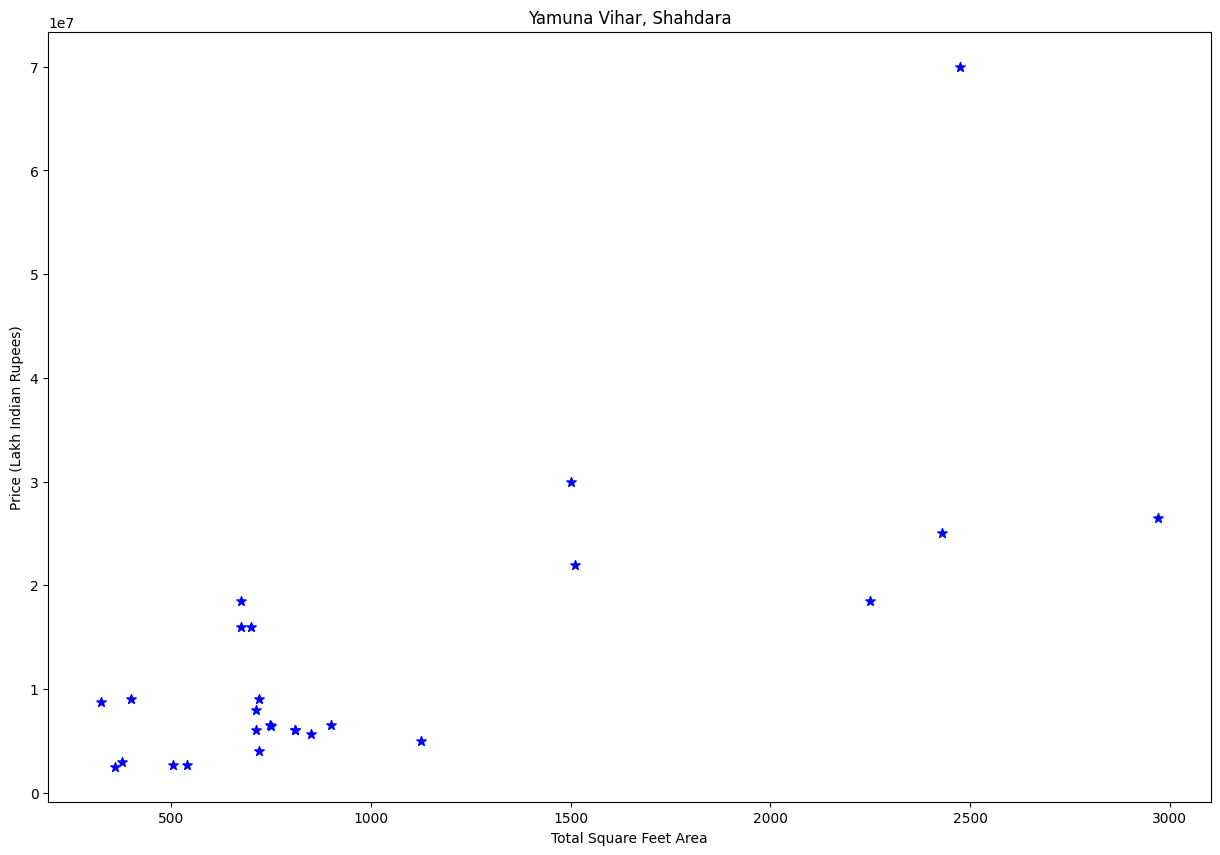

In [29]:
def plot_scatter_chart(df,Locality):
    loca = df[df.Locality==Locality]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(loca.Area,loca.Price,marker='*', color='blue',label='Ppsqft.', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(Locality)

    
plot_scatter_chart(df4,"Yamuna Vihar, Shahdara")

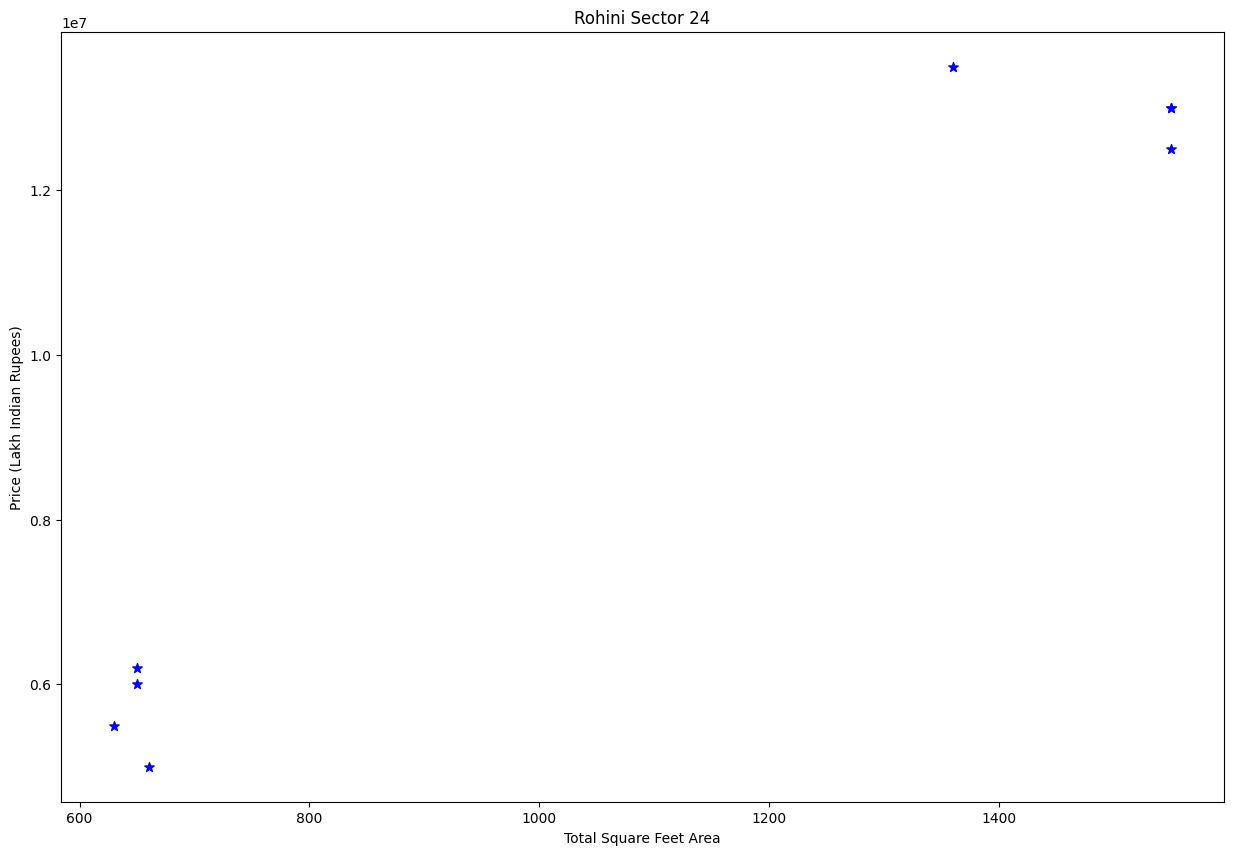

In [30]:
plot_scatter_chart(df4,"Rohini Sector 24")


Text(0, 0.5, 'Count')

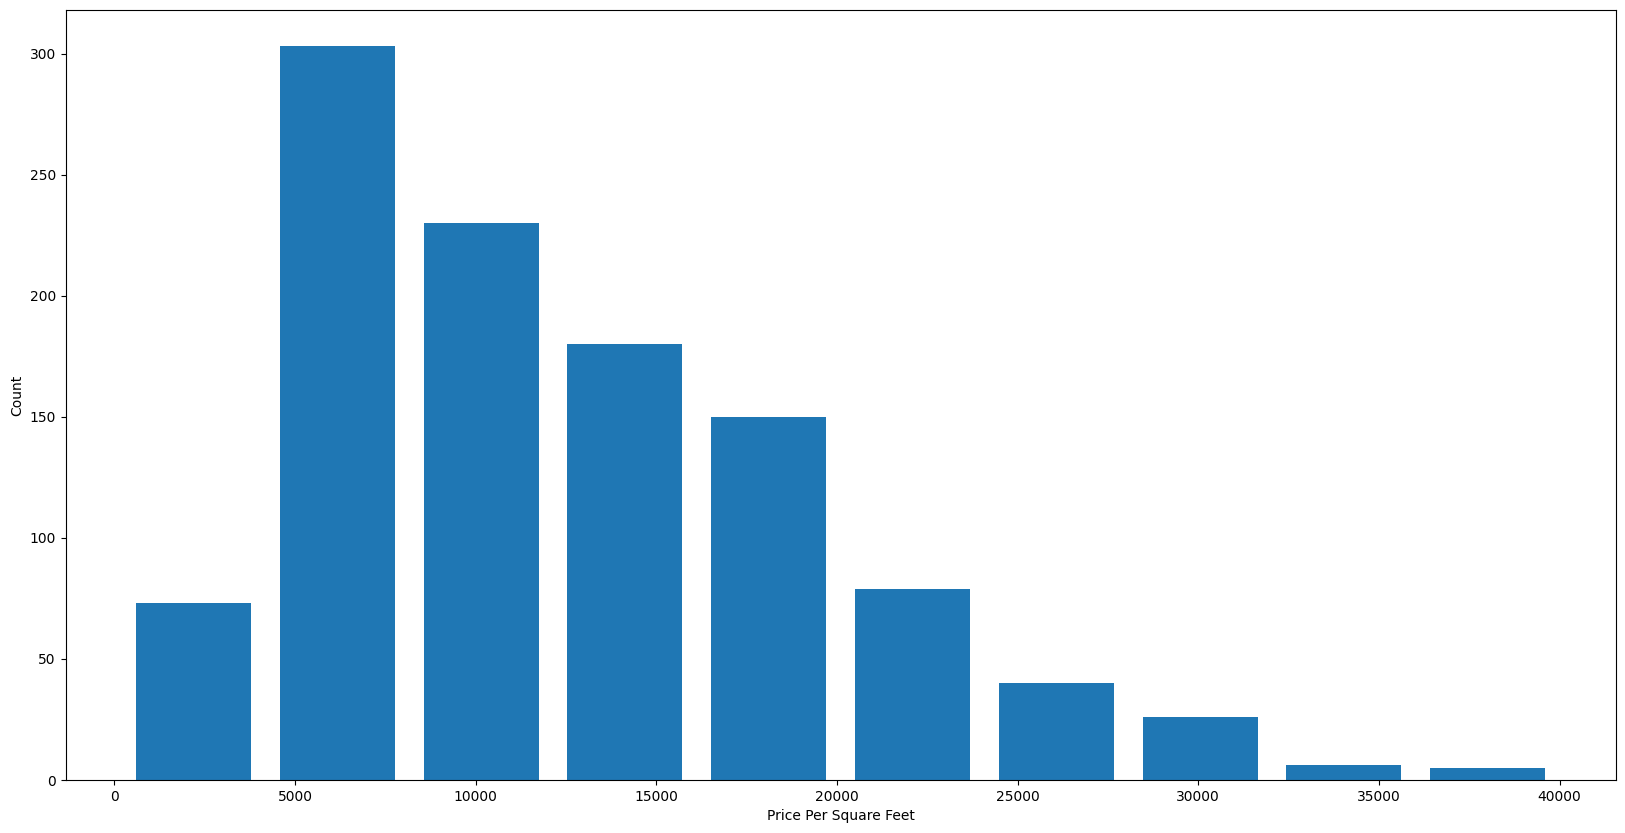

In [31]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.Per_Sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [32]:
df4.BHK.unique()

array([3, 2, 4, 5, 1, 6, 7], dtype=int64)

Text(0, 0.5, 'Count')

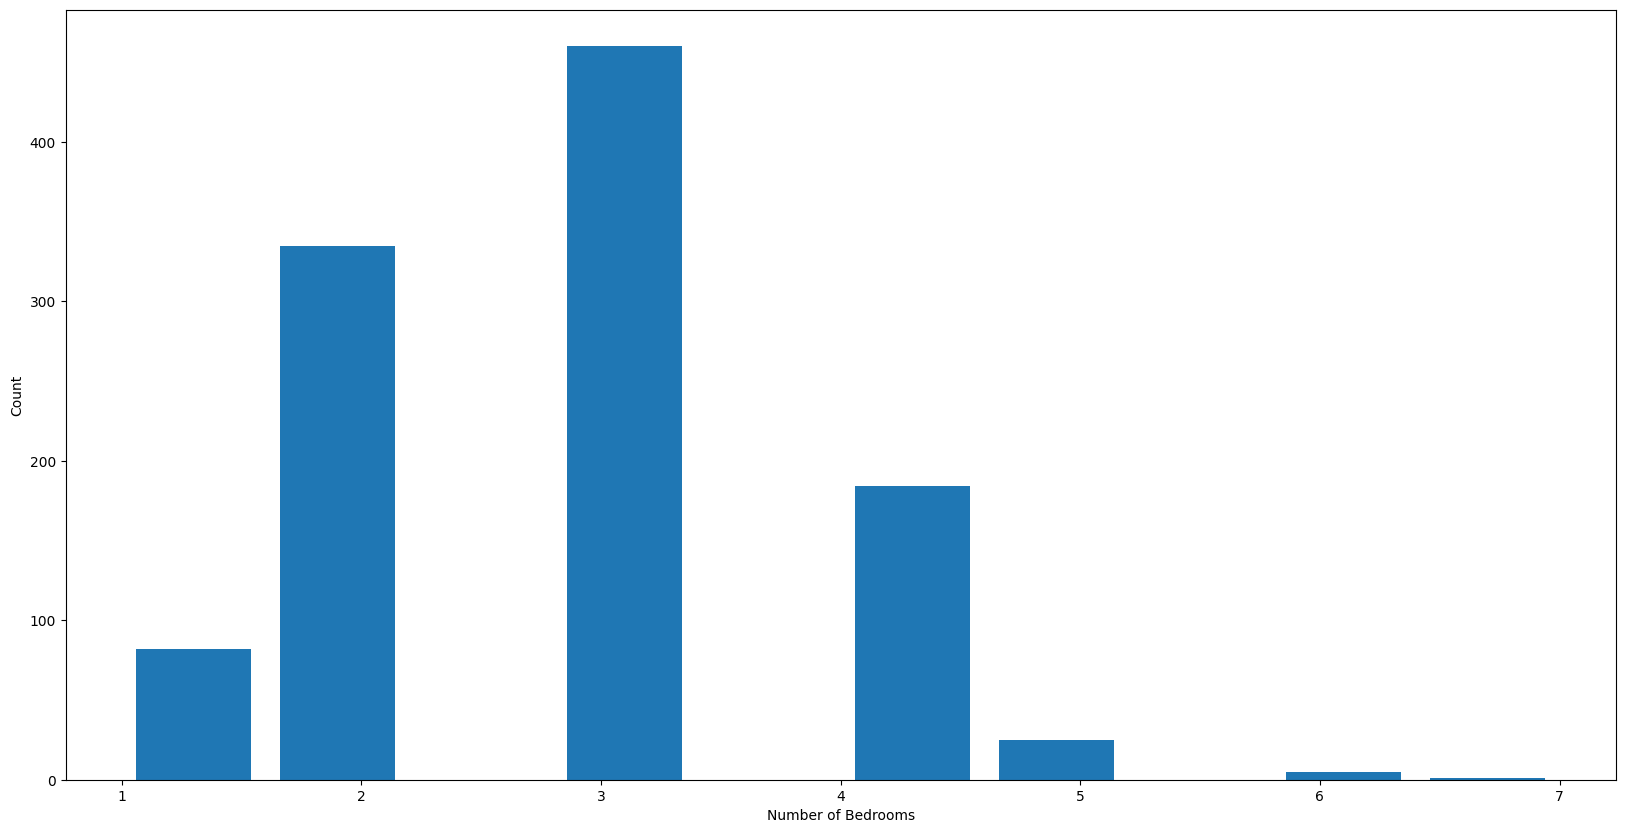

In [33]:
plt.hist(df4.BHK,rwidth=0.8)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")

In [34]:
df4.Bathroom.unique()


array([3., 2., 5., 4., 1., 7., 6.])

Text(0, 0.5, 'Count')

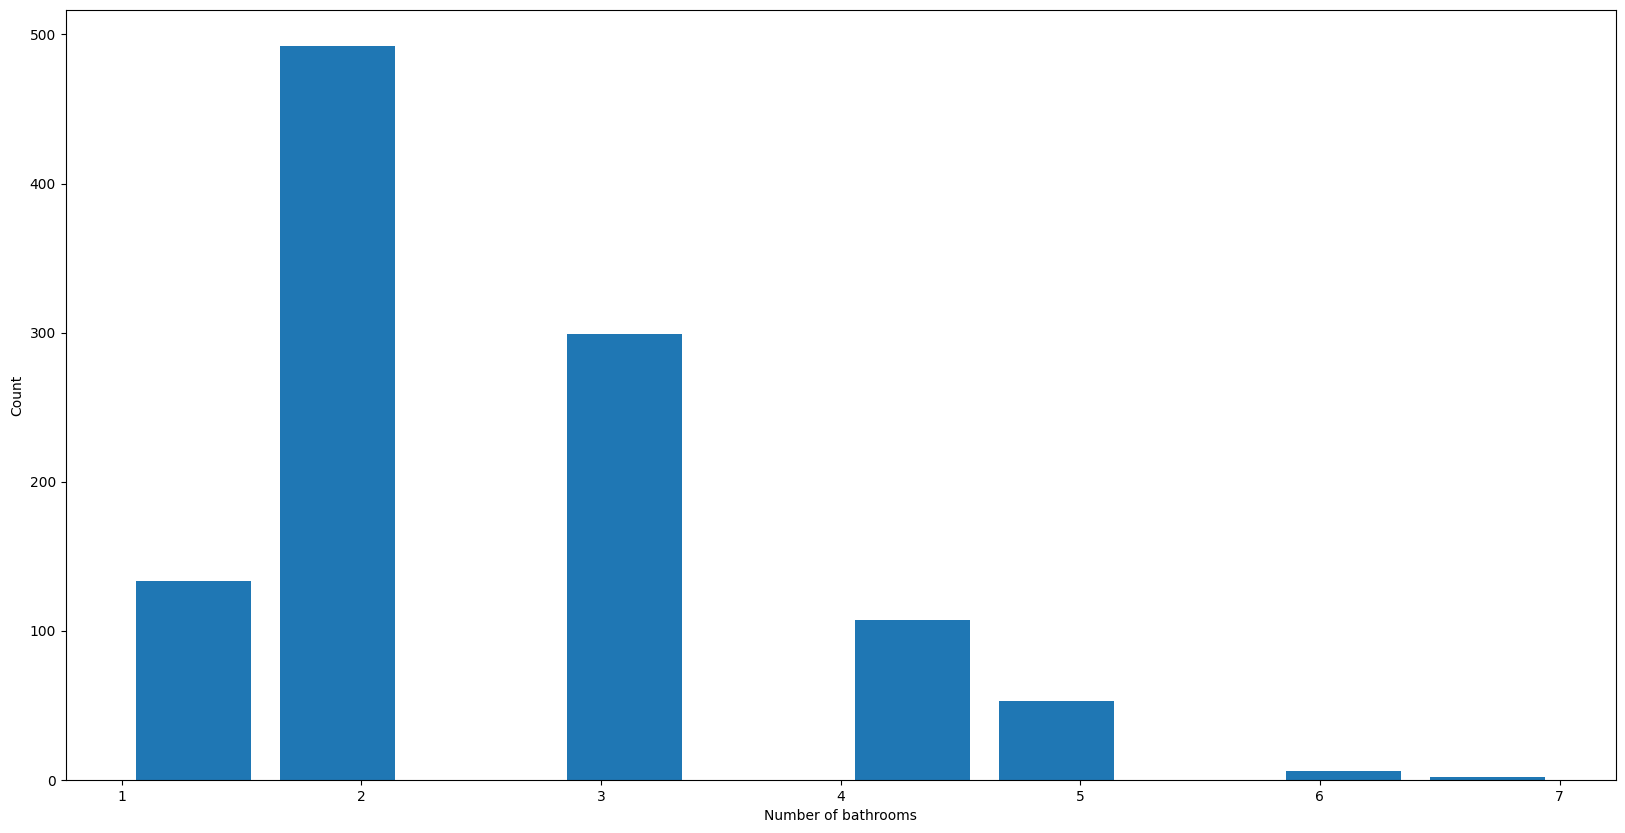

In [35]:
plt.hist(df4.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [36]:
dummies = pd.get_dummies(df4.Locality)
dummies.head(3)

,Alaknanda,Chhattarpur,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010","DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road","DLF Capital Greens, New Moti Nagar, Kirti Nagar","Dilshad Colony, Dilshad Garden",Hauz Khas,"J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",...,Patel Nagar West,Rohini Sector 24,Safdarjung Enclave,Saket,Sheikh Sarai Phase 1,"Sukhdev Vihar, Okhla","The Amaryllis, Karol Bagh",Vasundhara Enclave,"Yamuna Vihar, Shahdara",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df6 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')
df6.head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft,Alaknanda,Chhattarpur,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010",...,"New Moti Nagar, Kirti Nagar",Patel Nagar West,Rohini Sector 24,Safdarjung Enclave,Saket,Sheikh Sarai Phase 1,"Sukhdev Vihar, Okhla","The Amaryllis, Karol Bagh",Vasundhara Enclave,"Yamuna Vihar, Shahdara"
0,1500.0,3,3.0,Alaknanda,26500000,17666.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1400.0,3,2.0,Alaknanda,19000000,13571.428571,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100.0,2,2.0,Alaknanda,15000000,13636.363636,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,2.0,Alaknanda,17500000,14583.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1400.0,2,2.0,Alaknanda,14000000,10000.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df5 = df6.drop(['Per_Sqft','Locality'],axis='columns')
df5.head(2)

,Area,BHK,Bathroom,Price,Alaknanda,Chhattarpur,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010","DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road","DLF Capital Greens, New Moti Nagar, Kirti Nagar",...,"New Moti Nagar, Kirti Nagar",Patel Nagar West,Rohini Sector 24,Safdarjung Enclave,Saket,Sheikh Sarai Phase 1,"Sukhdev Vihar, Okhla","The Amaryllis, Karol Bagh",Vasundhara Enclave,"Yamuna Vihar, Shahdara"
0,1500.0,3,3.0,26500000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1400.0,3,2.0,19000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df5.shape


(1092, 34)

In [40]:
X = df5.drop(['Price'],axis='columns')


In [41]:
y = df5.Price


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [43]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6857956109310088

In [44]:
def predict_price(Locality,Area,Bathroom,BHK):    
    loc_index = np.where(X.columns==Locality)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Bathroom
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [45]:
predict_price('Alaknanda',357,1,2)

c:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8547665.017572079

In [46]:
predict_price('Vasundhara Enclave',2000,3,5)

c:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49458422.66409209

In [47]:
predict_price('Saket',1269,2,4)

c:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40740746.24147782